In [673]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Reading and Understanding the Data

- Importing data using the pandas library
- Understanding the structure of the data

In [674]:
lead = pd.read_csv('Leads.csv')
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [675]:
lead.shape

(9240, 37)

In [676]:
# .info() is used to print a concise summary of a DataFrame
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [677]:
# Determining NULL values in percentage
round(100*lead.isnull().sum()/lead.shape[0],2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [678]:
lead.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


### Data Cleaning

In [679]:
# Select values are similar to NULL.
# Converting 'Select' values to NaN.
lead = lead.replace('Select', np.nan)

In [680]:
lead['Lead Quality'].describe()

count         4473
unique           5
top       Might be
freq          1560
Name: Lead Quality, dtype: object

In [681]:
# Dropping the columns with a high amount of Null values (nearly 70%)
lead = lead.drop(lead.loc[:,list(round(100*(lead.isnull().sum()/len(lead.index)), 2)>70)].columns, 1)

### Data Visualisation

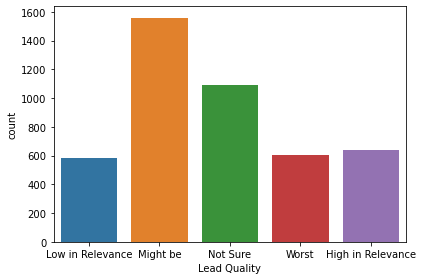

In [682]:
# 
sns.countplot(lead['Lead Quality'])
plt.tight_layout()
plt.show()

In [683]:
lead['Lead Quality'] = lead['Lead Quality'].replace(np.nan, 'Not Sure')

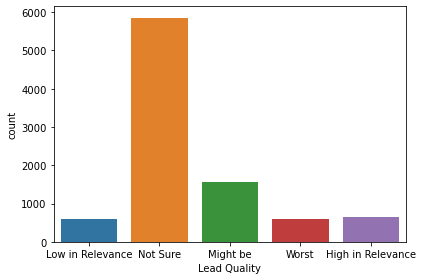

In [684]:
# 
sns.countplot(lead['Lead Quality'])
plt.tight_layout()
plt.show()

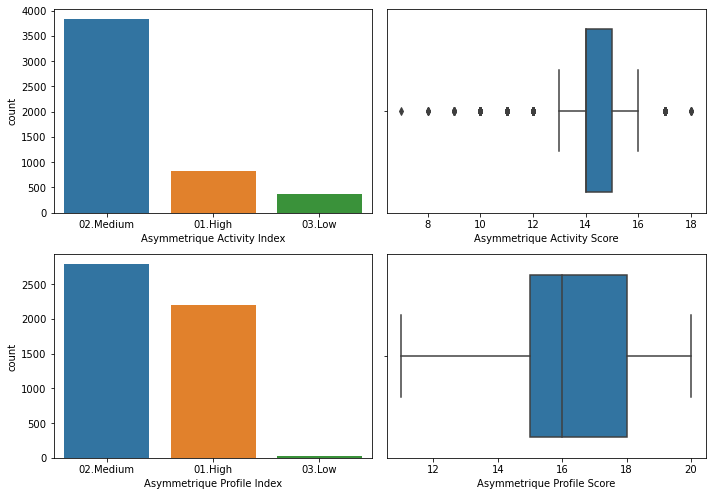

In [685]:
fig, axs = plt.subplots(2,2, figsize = (10,7))
plt1 = sns.countplot(lead['Asymmetrique Activity Index'], ax = axs[0,0])
plt2 = sns.boxplot(lead['Asymmetrique Activity Score'], ax = axs[0,1])
plt3 = sns.countplot(lead['Asymmetrique Profile Index'], ax = axs[1,0])
plt4 = sns.boxplot(lead['Asymmetrique Profile Score'], ax = axs[1,1])
plt.tight_layout()
plt.show()

- There is too much variation in these parameters so its not reliable to impute any value in it.
- 45% null values means we need to drop these columns.

In [686]:
lead = lead.drop(['Asymmetrique Activity Index','Asymmetrique Activity Score','Asymmetrique Profile Index','Asymmetrique Profile Score'],1)

In [687]:
lead.City.describe()

count       5571
unique         6
top       Mumbai
freq        3222
Name: City, dtype: object

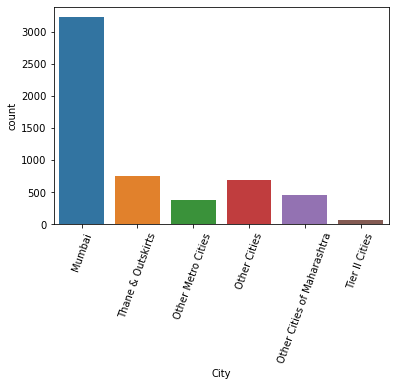

In [688]:
sns.countplot(lead.City)
plt.xticks(rotation = 70)
plt.show()

In [689]:
# Around 60% of the data is Mumbai so we can impute Mumbai in the missing values.
lead['City'] = lead['City'].replace(np.nan, 'Mumbai')

In [690]:
lead.Specialization.describe()

count                   5860
unique                    18
top       Finance Management
freq                     976
Name: Specialization, dtype: object

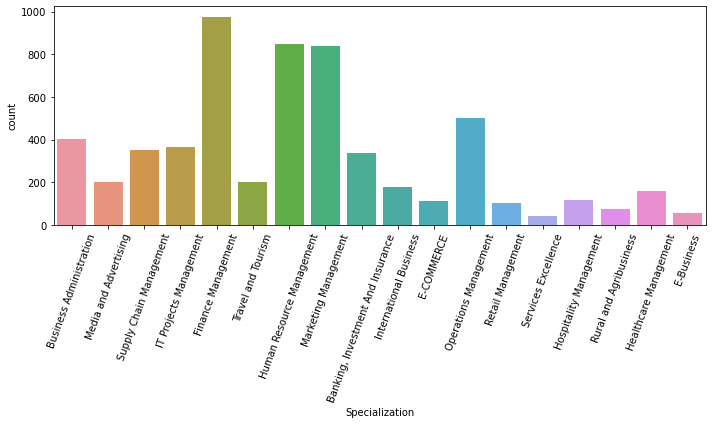

In [691]:
plt.figure(figsize=[10,6])
sns.countplot(lead.Specialization)
plt.xticks(rotation = 70)
plt.tight_layout()
plt.show()

In [692]:
lead['Specialization'] = lead['Specialization'].replace(np.nan, 'Others')

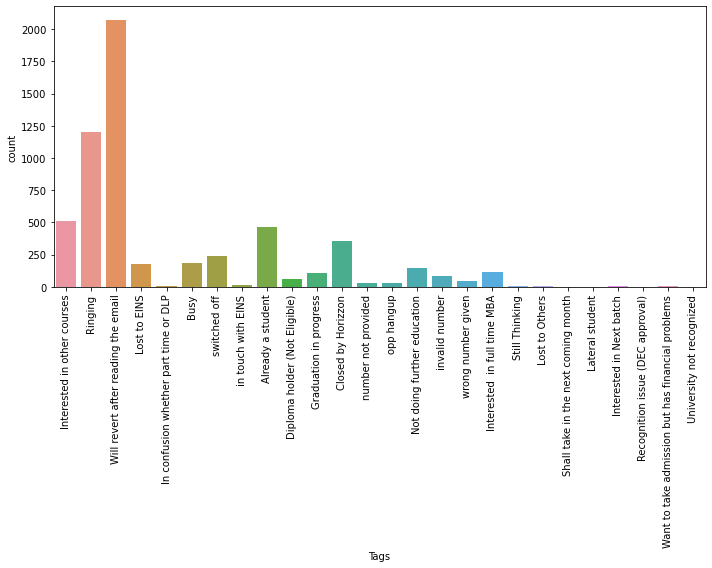

In [693]:
plt.figure(figsize=[10,8])
sns.countplot(lead.Tags)
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

In [694]:
lead['Tags'] = lead['Tags'].replace(np.nan, 'Will revert after reading the email')

In [695]:
lead['What matters most to you in choosing a course'].describe()

count                        6531
unique                          3
top       Better Career Prospects
freq                         6528
Name: What matters most to you in choosing a course, dtype: object

In [696]:
lead['What matters most to you in choosing a course'] = lead['What matters most to you in choosing a course'].replace(np.nan, 'Better Career Prospects')

In [697]:
lead['What is your current occupation'].describe()

count           6550
unique             6
top       Unemployed
freq            5600
Name: What is your current occupation, dtype: object

In [698]:
lead['What is your current occupation'] = lead['What is your current occupation'].replace(np.nan, 'Unemployed')

In [699]:
# Country is India for most values so let's impute the same in missing values.
lead['Country'] = lead['Country'].replace(np.nan, 'India')

In [700]:
# Rest missing values are under 2% so we can drop these rows.
lead.dropna(inplace = True)

In [701]:
# Determining NULL values in percentage after all cleaning process
round(100*(lead.isnull().sum()/len(lead.index)), 2)

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                            

## Exploratory Data Analytics

### Univariate Analysis

In [702]:
# Converted is the target variable, Indicates whether a lead has been successfully converted (1) or not (0).
Converted = (sum(lead['Converted'])/len(lead['Converted'].index))*100
Converted

37.85541106458012

In [703]:
lead.describe().columns

Index(['Lead Number', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit'],
      dtype='object')

In [704]:
catg_list = ['Lead Origin', 'Lead Source','Last Activity','Country', 'Specialization', 'What is your current occupation',
     'Tags', 'Lead Quality','City',  'Last Notable Activity']

In [705]:
yes_no_list =['Do Not Email', 'Do Not Call','What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement','Through Recommendations',
       'Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview',]

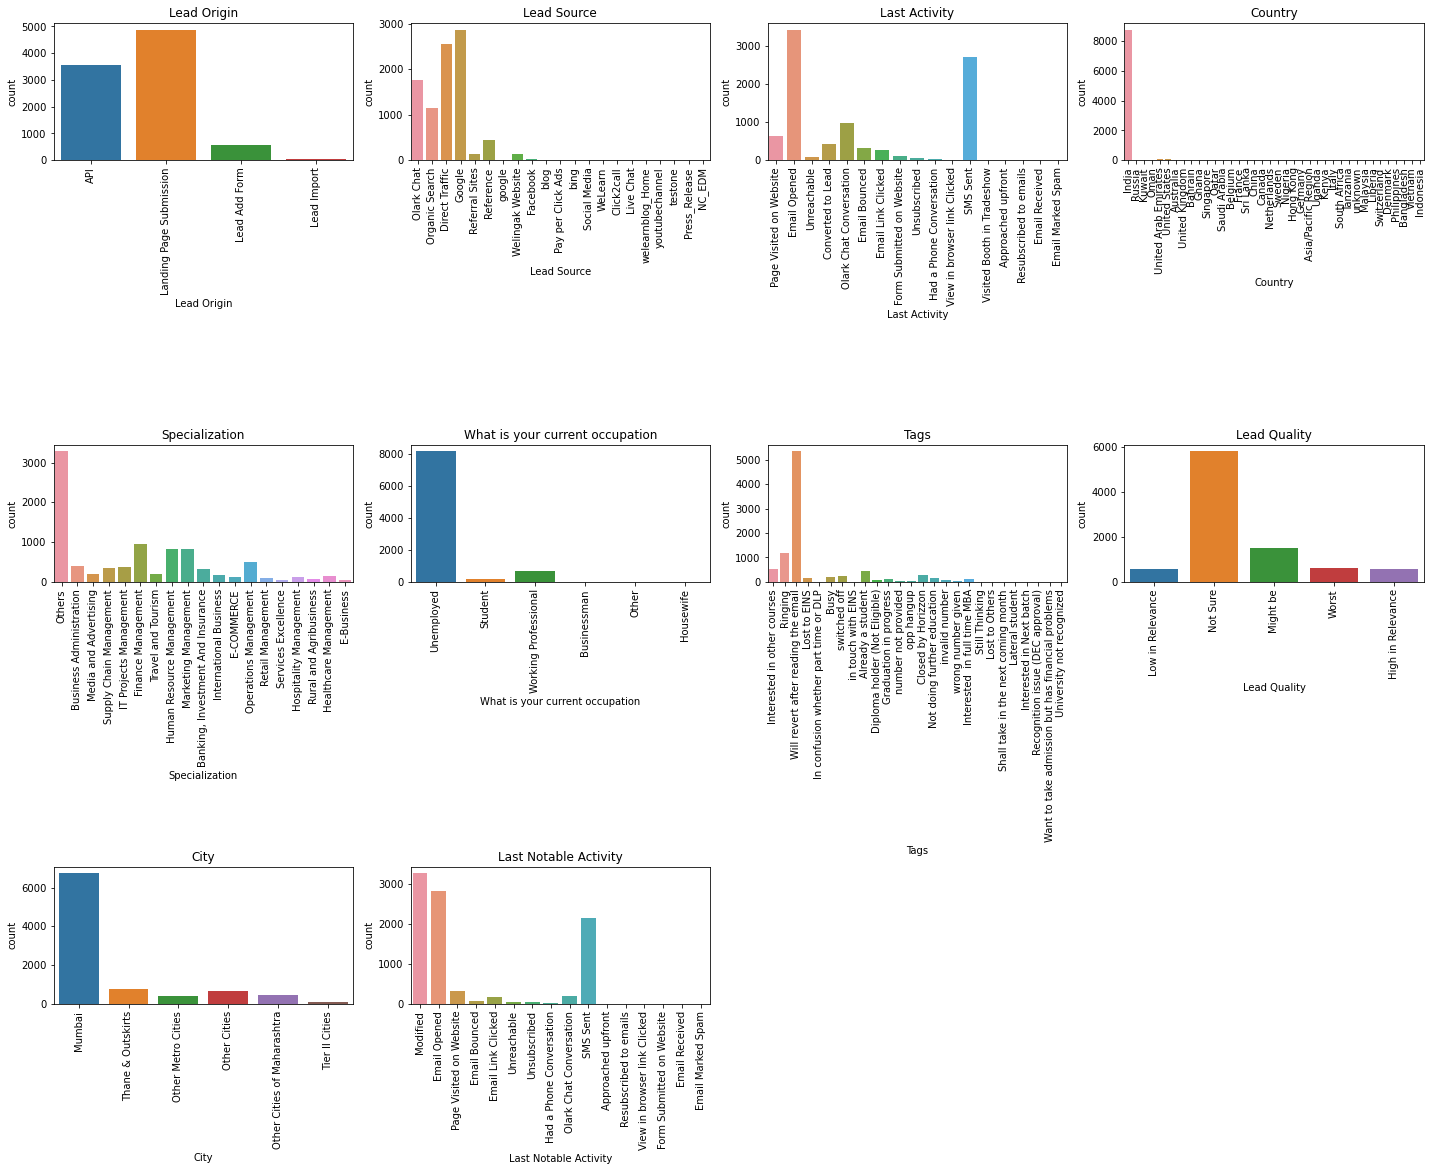

In [710]:
# Plotting columns which are categorised in more than 2 groups
plt.figure(figsize=[20,20])
f = catg_list
for i in enumerate(f):
    plt.subplot(4,4,i[0]+1)
    sns.countplot(lead[i[1]])
    plt.xticks(rotation = 90)
    plt.title(i[1])
plt.tight_layout()
plt.show()

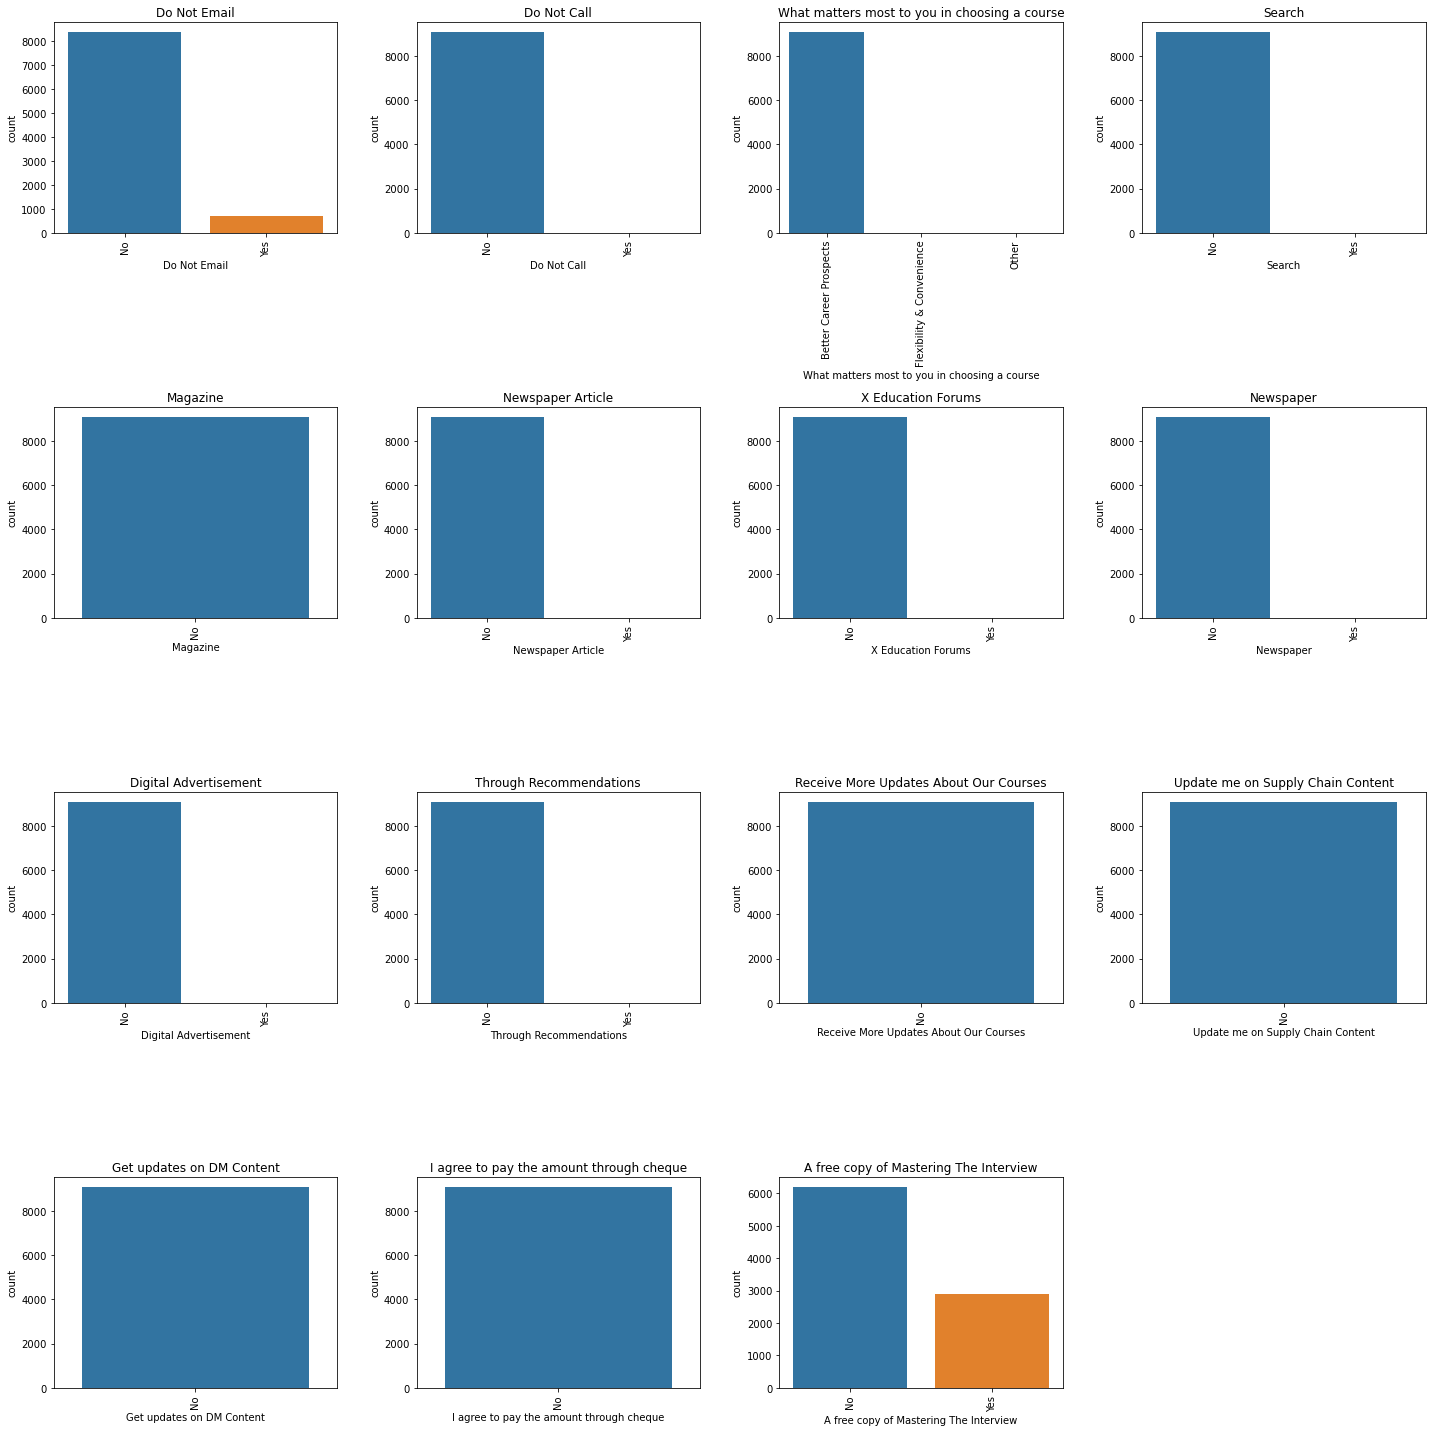

In [619]:
# Plotting columns which mostly contains 'YES'/'NO' values
plt.figure(figsize=[20,20])
f = yes_no_list
for i in enumerate(f):
    plt.subplot(4,4,i[0]+1)
    sns.countplot(lead[i[1]])
    plt.xticks(rotation = 90)
    plt.title(i[1])
plt.tight_layout()
plt.show()

#### Visualising numerical columns

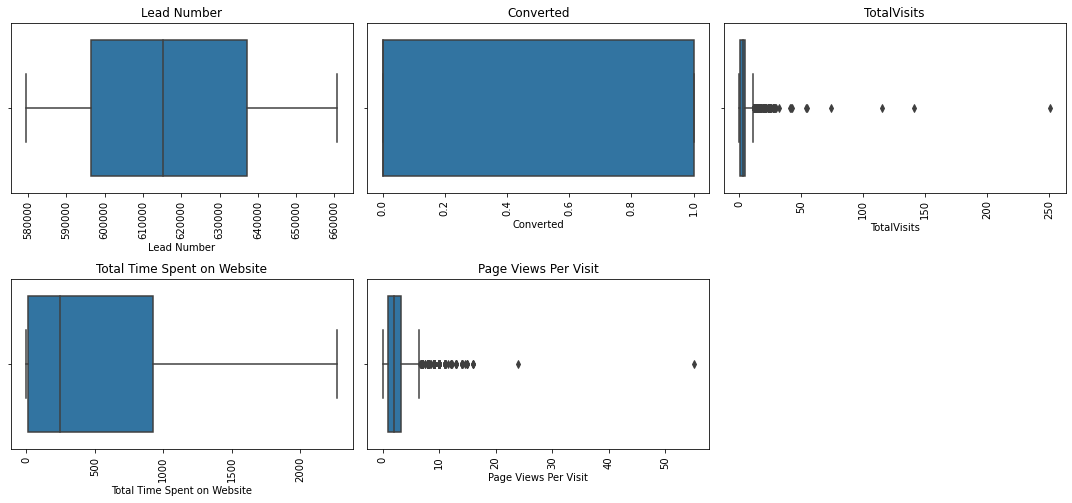

In [620]:
plt.figure(figsize=[15,10])
f = ['Lead Number', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit']
for i in enumerate(f):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(lead[i[1]])
    plt.xticks(rotation = 90)
    plt.title(i[1])
plt.tight_layout()
plt.show()

In [621]:
# Let's keep considerable categories as such and club all others to "Others"
lead['Lead Source'] = lead['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
  'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Others')
lead['Last Activity'] = lead['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked','Visited Booth in Tradeshow', 'Approached upfront',
                                                       'Resubscribed to emails','Email Received', 'Email Marked Spam'], 'Others')
lead['Tags'] = lead['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)',
                                     'Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking',
                                    'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                    'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                    'University not recognized'], 'Others')


### Handling Outliers

In [622]:
# As we can see there are a number of outliers in the data.
# We will cap the outliers to 95% value for analysis.
percentiles = lead['TotalVisits'].quantile([0.05,0.95]).values
lead['TotalVisits'][lead['TotalVisits'] <= percentiles[0]] = percentiles[0]
lead['TotalVisits'][lead['TotalVisits'] >= percentiles[1]] = percentiles[1]


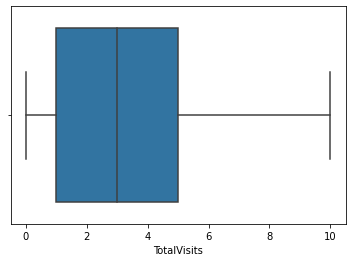

In [623]:
sns.boxplot(lead['TotalVisits'])
plt.show()

In [624]:
percentiles = lead['Page Views Per Visit'].quantile([0.05,0.95]).values
lead['Page Views Per Visit'][lead['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
lead['Page Views Per Visit'][lead['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]

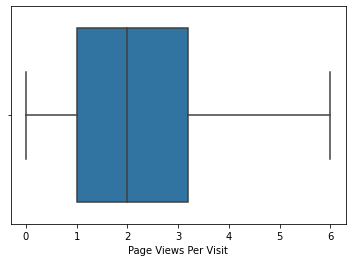

In [625]:
sns.boxplot(lead['Page Views Per Visit'])
plt.show()

#### Result of EDA
Based on the univariate analysis we have seen that many columns are not adding any information to the model, hence we can drop them for further analysis.

In [626]:
lead = lead.drop(['Lead Number','What matters most to you in choosing a course','Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
           'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content',
           'Get updates on DM Content','I agree to pay the amount through cheque','A free copy of Mastering The Interview','Country'],1)

### Data Preparation

Converting some binary variables (Yes/No) to 1/0

In [627]:
# List of variables to map
varlist =  ['Do Not Email', 'Do Not Call']

# Defining the map function and applying the function to the housing list
def yes_no_map(x):
    return x.map({'Yes': 1, "No": 0})

lead[varlist] = lead[varlist].apply(yes_no_map)

For categorical variables with multiple levels, create dummy features

In [628]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy_var = pd.get_dummies(lead[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
                            'What is your current occupation',
                            'Tags','Lead Quality','City','Last Notable Activity']], drop_first=True)

In [629]:
dummy_var.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [630]:
# Adding the results to dataframe
lead = pd.concat([lead, dummy_var], axis=1)

In [631]:
lead = lead.drop(['Lead Origin', 'Lead Source', 'Last Activity', 
                  'Specialization','What is your current occupation',
                  'Tags','Lead Quality','City','Last Notable Activity'], axis = 1)
lead.head()

,Prospect ID,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0,0,0.0,0,0.0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,0,0,0,5.0,674,2.5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0,0,1,2.0,1532,2.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,0,0,1.0,305,1.0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,0,0,1,2.0,1428,1.0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


## Building Model

In [632]:
from sklearn.model_selection import train_test_split

# Putting feature variable to X
X = lead.drop(['Prospect ID','Converted'], axis=1)
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


In [633]:
y = lead['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [634]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Feature Scaling

In [635]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3009,0,0,-0.432779,-0.160255,-0.155018,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1012,1,0,-0.432779,-0.540048,-0.155018,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9226,0,0,-1.150329,-0.888650,-1.265540,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4750,0,0,-0.432779,1.643304,-0.155018,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7987,0,0,0.643547,2.017593,0.122613,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [636]:
# Checking the Churn Rate
Converted = (sum(lead['Converted'])/len(lead['Converted'].index))*100
Converted                                                                            #almost 38% conversion

37.85541106458012

####  First Training Model

In [637]:
import statsmodels.api as sm


In [638]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6264
Model Family:                Binomial   Df Model:                           86
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1249.6
Date:                Mon, 11 Jan 2021   Deviance:                       2499.3
Time:                        20:14:11   Pearson chi2:                 3.88e+04
No. Iterations:                    24                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   23.1132   2.16e+05      0.000      1.000   -4.23e+05    4.23e+05
Do Not Email                                            -1.3894      0.327     -4.247      0.000      -2.031      -0.748
Do Not Call                                             23.7239   1.37e+05      0.000      1.000   -2.68e+05    2.68e+05
TotalVisits                                              0.1831      0.087      2.110      0.035       0.013       0.353
Total Time Spent on Website                              1.1465      0.064     17.919      0.000       1.021       1.272
Page Views Per Visit                                    -0.3258      0.099     -3.294      0.001      -0.520      -0.132
Lead Origin_Landing Page Submission                     -0.9634      0.222     -4.348      0.000      -1.398      -0.529
Lead Origin_Lead Add Form                               -0.4030      1.288     -0.313      0.754      -2.927       2.121
Lead Origin_Lead Import                                 29.7453   2.16e+05      0.000      1.000   -4.23e+05    4.23e+05
Lead Source_Facebook                                   -28.6392   2.16e+05     -0.000      1.000   -4.23e+05    4.23e+05
Lead Source_Google                                       0.2048      0.155      1.321      0.186      -0.099       0.509
Lead Source_Olark Chat                                   0.8688      0.234      3.715      0.000       0.410       1.327
Lead Source_Organic Search                               0.2253      0.210      1.071      0.284      -0.187       0.638
Lead Source_Others                                       0.7611      0.815      0.934      0.350      -0.836       2.359
Lead Source_Reference                                    1.7718      1.344      1.318      0.187      -0.863       4.406
Lead Source_Referral Sites                              -0.0975      0.491     -0.199      0.843      -1.059       0.864
Lead Source_Welingak Website                             5.4638      1.486      3.676      0.000       2.550       8.377
Lead Source_google                                     -23.0154      1e+05     -0.000      1.000   -1.97e+05    1.97e+05
Last Activity_Email Bounced                             -0.5470      0.870     -0.629      0.530      -2.252       1.158
Last Activity_Email Link Clicked                         0.8431      0.644      1.310      0.190      -0.418       2.104
Last Activity_Email Opened                              -0.0006      0.384     -0.001      0.999      -0.754       0.753
Last Activity_Form Submitted on Website                  0.1354      0.593      0.228      0.819      -1.027       1.298
Last Activity_Olark Chat Conversation                   -0

In [639]:
# Feature Selection Using RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [640]:
rfe.support_

array([ True, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False,  True,  True, False, False,
        True, False, False,  True,  True,  True,  True,  True, False,
       False,  True,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False])

In [641]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 34),
 ('TotalVisits', False, 43),
 ('Total Time Spent on Website', False, 3),
 ('Page Views Per Visit', False, 39),
 ('Lead Origin_Landing Page Submission', False, 16),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 2),
 ('Lead Source_Facebook', False, 45),
 ('Lead Source_Google', False, 41),
 ('Lead Source_Olark Chat', False, 5),
 ('Lead Source_Organic Search', False, 40),
 ('Lead Source_Others', False, 48),
 ('Lead Source_Reference', False, 68),
 ('Lead Source_Referral Sites', False, 53),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_google', False, 32),
 ('Last Activity_Email Bounced', False, 29),
 ('Last Activity_Email Link Clicked', False, 36),
 ('Last Activity_Email Opened', False, 67),
 ('Last Activity_Form Submitted on Website', False, 69),
 ('Last Activity_Olark Chat Conversation', False, 13),
 ('Last Activity_Others', False, 9),
 ('Last Activity_Page Visited on Website', False, 37),

In [642]:
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Lead Origin_Lead Add Form',
       'Lead Source_Welingak Website',
       'What is your current occupation_Unemployed', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_switched off', 'Tags_wrong number given', 'Lead Quality_Not Sure',
       'Lead Quality_Worst', 'Last Notable Activity_SMS Sent'],
      dtype='object')

In [643]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1580.1
Date:                Mon, 11 Jan 2021   Deviance:                       3160.2
Time:                        20:14:22   Pearson chi2:                 3.11e+04
No. Iterations:                    24                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                         -0.7920      0.278     -2.845      0.004      -1.338      -0.246
Do Not Email                                  -1.3202      0.212     -6.236      0.000      -1.735      -0.905
Lead Origin_Lead Add Form                      1.0521      0.363      2.897      0.004       0.340       1.764
Lead Source_Welingak Website                   3.4638      0.819      4.231      0.000       1.859       5.068
What is your current occupation_Unemployed    -1.1148      0.237     -4.713      0.000      -1.578      -0.651
Tags_Busy                                      3.5772      0.333     10.752      0.000       2.925       4.229
Tags_Closed by Horizzon                        7.7760      0.762     10.203      0.000       6.282       9.270
Tags_Lost to EINS                              8.9986      0.754     11.931      0.000       7.520      10.477
Tags_Ringing                                  -1.9203      0.340     -5.640      0.000      -2.588      -1.253
Tags_Will revert after reading the email       3.7576      0.229     16.412      0.000       3.309       4.206
Tags_invalid number                          -23.4125   2.21e+04     -0.001      0.999   -4.34e+04    4.34e+04
Tags_switched off                             -2.5224      0.589     -4.279      0.000      -3.678      -1.367
Tags_wrong number given                      -23.0270   3.17e+04     -0.001      0.999   -6.21e+04     6.2e+04
Lead Quality_Not Sure                         -3.3269      0.129    -25.702      0.000      -3.581      -3.073
Lead Quality_Worst                            -3.9922      0.832     -4.798      0.000      -5.623      -2.361
Last Notable Activity_SMS Sent                 2.7952      0.122     22.846      0.000       2.555       3.035
==============================================================================================================
"""

In [644]:
col1 = col.drop('Tags_invalid number',1)

In [645]:
col1

Index(['Do Not Email', 'Lead Origin_Lead Add Form',
       'Lead Source_Welingak Website',
       'What is your current occupation_Unemployed', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Tags_wrong number given', 'Lead Quality_Not Sure',
       'Lead Quality_Worst', 'Last Notable Activity_SMS Sent'],
      dtype='object')

In [646]:
X_train_sm = sm.add_constant(X_train[col1])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1585.9
Date:                Mon, 11 Jan 2021   Deviance:                       3171.8
Time:                        20:14:22   Pearson chi2:                 3.07e+04
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                         -0.9144      0.282     -3.245      0.001      -1.467      -0.362
Do Not Email                                  -1.3129      0.211     -6.218      0.000      -1.727      -0.899
Lead Origin_Lead Add Form                      1.0839      0.365      2.969      0.003       0.368       1.800
Lead Source_Welingak Website                   3.4275      0.819      4.184      0.000       1.822       5.033
What is your current occupation_Unemployed    -1.1577      0.239     -4.848      0.000      -1.626      -0.690
Tags_Busy                                      3.7579      0.331     11.338      0.000       3.108       4.407
Tags_Closed by Horizzon                        7.9271      0.763     10.394      0.000       6.432       9.422
Tags_Lost to EINS                              9.1535      0.755     12.128      0.000       7.674      10.633
Tags_Ringing                                  -1.7229      0.339     -5.089      0.000      -2.386      -1.059
Tags_Will revert after reading the email       3.9200      0.230     17.026      0.000       3.469       4.371
Tags_switched off                             -2.3187      0.588     -3.942      0.000      -3.471      -1.166
Tags_wrong number given                      -20.8331   1.17e+04     -0.002      0.999   -2.29e+04    2.28e+04
Lead Quality_Not Sure                         -3.3174      0.129    -25.685      0.000      -3.571      -3.064
Lead Quality_Worst                            -3.9830      0.834     -4.777      0.000      -5.617      -2.349
Last Notable Activity_SMS Sent                 2.7537      0.121     22.849      0.000       2.518       2.990
==============================================================================================================
"""

In [647]:
col2 = col1.drop('Tags_wrong number given',1)

In [648]:
col2

Index(['Do Not Email', 'Lead Origin_Lead Add Form',
       'Lead Source_Welingak Website',
       'What is your current occupation_Unemployed', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Lead Quality_Not Sure', 'Lead Quality_Worst',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [649]:
X_train_sm = sm.add_constant(X_train[col2])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1587.9
Date:                Mon, 11 Jan 2021   Deviance:                       3175.8
Time:                        20:14:23   Pearson chi2:                 3.08e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                         -0.9661      0.283     -3.417      0.001      -1.520      -0.412
Do Not Email                                  -1.3127      0.211     -6.223      0.000      -1.726      -0.899
Lead Origin_Lead Add Form                      1.0963      0.366      2.995      0.003       0.379       1.814
Lead Source_Welingak Website                   3.4147      0.820      4.166      0.000       1.808       5.021
What is your current occupation_Unemployed    -1.1746      0.240     -4.899      0.000      -1.644      -0.705
Tags_Busy                                      3.8305      0.330     11.598      0.000       3.183       4.478
Tags_Closed by Horizzon                        7.9914      0.763     10.480      0.000       6.497       9.486
Tags_Lost to EINS                              9.2178      0.755     12.217      0.000       7.739      10.697
Tags_Ringing                                  -1.6472      0.337     -4.885      0.000      -2.308      -0.986
Tags_Will revert after reading the email       3.9881      0.229     17.380      0.000       3.538       4.438
Tags_switched off                             -2.2412      0.587     -3.816      0.000      -3.392      -1.090
Lead Quality_Not Sure                         -3.3158      0.129    -25.690      0.000      -3.569      -3.063
Lead Quality_Worst                            -3.9600      0.836     -4.734      0.000      -5.599      -2.321
Last Notable Activity_SMS Sent                 2.7443      0.120     22.856      0.000       2.509       2.980
==============================================================================================================
"""

In [650]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3009    0.187192
1012    0.167079
9226    0.000821
4750    0.781753
7987    0.977276
1281    0.989966
2880    0.187192
4971    0.753675
7536    0.863827
1248    0.000821
dtype: float64

In [651]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([1.87191534e-01, 1.67078806e-01, 8.21369066e-04, 7.81753466e-01,
       9.77276034e-01, 9.89966304e-01, 1.87191534e-01, 7.53674840e-01,
       8.63826796e-01, 8.21369066e-04])

In [652]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.187192,3009
1,0,0.167079,1012
2,0,0.000821,9226
3,1,0.781753,4750
4,1,0.977276,7987


In [653]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted
0,0,0.187192,3009,0
1,0,0.167079,1012,0
2,0,0.000821,9226,0
3,1,0.781753,4750,1
4,1,0.977276,7987,1


In [654]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3756  149]
 [ 363 2083]]


In [655]:
# Check the overall accuracy.
round(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted),2)

0.92

### Checking VIFs

In [656]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col2].columns
vif['VIF'] = [variance_inflation_factor(X_train[col2].values, i) for i in range(X_train[col2].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,What is your current occupation_Unemployed,7.18
10,Lead Quality_Not Sure,4.04
8,Tags_Will revert after reading the email,3.81
7,Tags_Ringing,1.80
1,Lead Origin_Lead Add Form,1.58
12,Last Notable Activity_SMS Sent,1.52
11,Lead Quality_Worst,1.35
2,Lead Source_Welingak Website,1.34
5,Tags_Closed by Horizzon,1.25
9,Tags_switched off,1.16


In [657]:
col3=col2.drop('What is your current occupation_Unemployed',1)
col3

Index(['Do Not Email', 'Lead Origin_Lead Add Form',
       'Lead Source_Welingak Website', 'Tags_Busy', 'Tags_Closed by Horizzon',
       'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Lead Quality_Not Sure', 'Lead Quality_Worst',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [658]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col3].columns
vif['VIF'] = [variance_inflation_factor(X_train[col3].values, i) for i in range(X_train[col3].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,Lead Quality_Not Sure,2.62
7,Tags_Will revert after reading the email,2.57
1,Lead Origin_Lead Add Form,1.58
6,Tags_Ringing,1.52
11,Last Notable Activity_SMS Sent,1.51
2,Lead Source_Welingak Website,1.34
4,Tags_Closed by Horizzon,1.13
0,Do Not Email,1.10
3,Tags_Busy,1.10
8,Tags_switched off,1.10


#### Sensitivity

In [659]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [660]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8515944399018807

### Assigning Lead Score

In [661]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,Lead_Score
0,0,0.187192,3009,0,19
1,0,0.167079,1012,0,17
2,0,0.000821,9226,0,0
3,1,0.781753,4750,1,78
4,1,0.977276,7987,1,98


In [662]:
y_train_pred_final.sort_values(by='Lead_Score',ascending=False).head(10)

,Converted,Converted_prob,Prospect ID,predicted,Lead_Score
4773,1,0.999703,1559,1,100
5477,1,0.998955,4773,1,100
2586,1,0.997131,5194,1,100
3794,1,0.997131,6418,1,100
3802,1,0.996625,8044,1,100
5458,1,0.999703,448,1,100
5456,1,0.999130,5839,1,100
2565,1,0.996942,3444,1,100
5445,1,0.996878,4139,1,100
3816,1,0.996878,5453,1,100


So, we have Prospect ID's of top 10 people who have a very high probability of taking the course with score 100.

### Making predictions on the test set

In [663]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_test.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3271,0,0,0.304501,-0.591008,0.998931,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1490,0,0,0.666261,1.894051,1.564920,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7936,0,0,-0.419021,-0.743117,-0.133048,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4216,0,0,-1.142542,-0.878732,-1.265027,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3830,0,0,1.751544,-0.578179,2.130909,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [664]:
X_test = X_test[col2]
X_test.head()

,Do Not Email,Lead Origin_Lead Add Form,Lead Source_Welingak Website,What is your current occupation_Unemployed,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Lead Quality_Not Sure,Lead Quality_Worst,Last Notable Activity_SMS Sent
3271,0,0,0,1,0,0,0,0,1,0,1,0,0
1490,0,0,0,0,0,0,0,0,1,0,0,0,0
7936,0,0,0,1,0,0,0,0,1,0,1,0,0
4216,0,1,0,0,0,1,0,0,0,0,0,0,0
3830,0,0,0,1,0,0,0,0,1,0,1,0,0


In [665]:
X_test_sm = sm.add_constant(X_test)
#Making predictions on the test set

y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

3271    0.187192
1490    0.953558
7936    0.187192
4216    0.999703
3830    0.187192
1800    0.953558
6507    0.012624
4821    0.000454
4223    0.996625
4714    0.187192
dtype: float64

In [666]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
# Let's see the head
y_pred_1.head()

,0
3271,0.187192
1490,0.953558
7936,0.187192
4216,0.999703
3830,0.187192


In [667]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)


In [668]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

,Converted,Prospect ID,0
0,0,3271,0.187192
1,1,1490,0.953558
2,0,7936,0.187192
3,1,4216,0.999703
4,0,3830,0.187192


In [669]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})
# Let's see the head of y_pred_final
y_pred_final.head()

,Converted,Prospect ID,Converted_prob
0,0,3271,0.187192
1,1,1490,0.953558
2,0,7936,0.187192
3,1,4216,0.999703
4,0,3830,0.187192


In [670]:
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.2 else 0)
y_pred_final.head()

,Converted,Prospect ID,Converted_prob,final_predicted
0,0,3271,0.187192,0
1,1,1490,0.953558,1
2,0,7936,0.187192,0
3,1,4216,0.999703,1
4,0,3830,0.187192,0


In [671]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
print(confusion2)

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

[[1628  106]
 [ 154  835]]


In [672]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8442871587462083

#### Result

- The sensititvity turns out to be approx 85% which is much greater than the initial (30%). Hence it is good to say that the aim is achieved and selected features are obtained which contribute most to enhance probability.